## Programming for Data Analysis Project
#### Hayley Doherty G00387849
---

My sister is a Spanish teacher in the local secondary school and so for this project I decided to ask her what factors were most influential in the grade a student go tin their mock LC exmas and simulated these factors to determine if there was any correlations between them and the grades received. The 3 factors I chose are the number of absences from class during the semester, the sex of the student and the number of hours per week the student studies outside of school. 

looking at hiigher level grades over past 3 years since her first year of teaching.
LC higher level marked from H1-H8.
grades are awarded according to a bell-shaped curve and so are normally distributed [1]. as the data for this vairable can only be between 1-8 it is called a discrete variable.
the number of absences from class is a count variable. it takes only non-negative integer values. when a count variable is treated as a random variable such as this, the poisson distribution can be used to represent its distribution.
the sex of the student is a categorical variable. this is a variable that has 2 or more categories with no intrinsicordering bwtween them [2]
similar to the number of absences, the number of hours per week a student studies outside of school is a count variable and ccan only take a non-negative integer value [3].

In [50]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import default_rng
rng = default_rng()

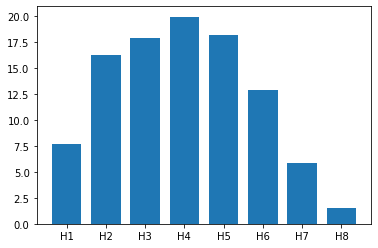

In [45]:
labels = ['H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8']
means = [7.7, 16.2, 17.9, 19.9, 18.1, 12.9, 5.8, 1.5]
x = np.arange(len(labels))
width = 0.75

ax = plt.subplot()
rects = ax.bar(x, means, width)
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.show()


In [66]:
# creating the grades varibale data
grades = rng.normal(3.5, 1.82, 105)
grades

array([ 5.57357238,  1.8984861 ,  4.51292641,  1.83438064,  2.71950842,
        3.14977847,  2.7185863 ,  1.66656977,  3.79833098,  4.52628129,
        2.97114628,  3.82655087,  7.14336872,  4.27561918,  2.70227755,
        4.17892026,  5.58859077,  5.50752504,  3.74781354,  0.84149888,
        0.35267228,  4.61389127,  3.16995093,  5.76690892,  4.28549784,
        3.40180713,  4.96850714,  4.88767348,  2.72492156,  3.98258942,
        7.90168825,  1.11891976,  4.57878798,  6.93959442,  4.37405687,
        4.23571591,  4.1430438 ,  2.95451208,  2.4328876 ,  4.17221595,
        2.62617439,  4.24378323,  0.1047074 ,  5.79270737,  3.53793028,
        6.37478899,  3.70030369,  3.97950771,  3.39191821,  3.09280335,
        7.84594777,  3.94256397,  4.10678652,  4.58572627,  1.80958362,
        0.62671293,  4.38910909,  3.63750307,  0.81874047,  5.79730831,
        3.10019509,  5.76024938,  5.32966068,  3.55774388,  5.24051255,
        3.12060877,  0.27217279,  7.30408042,  0.91202624,  6.04

In [69]:
x = [1, 2, 3, 4, 5, 6, 7, 8]
p = [0.08, 0.16, 0.18, 0.2, 0.18, 0.13, 0.06, 0.01]
grades = rng.binomial(x, p , 105)
grades

ValueError: shape mismatch: objects cannot be broadcast to a single shape

(array([ 2.,  9., 12., 24., 18., 20., 11.,  7.,  1.,  1.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

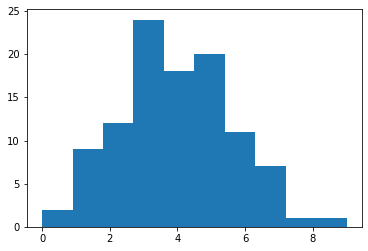

In [62]:
grades = np.round(grades, 0)
plt.hist(grades)

[1] https://careersportal.ie/school/lc_subject_detail.php?course_name=Spanish&search1=spanish&search2=&course_id=31&lc_subject_group=4

[2] https://stats.idre.ucla.edu/other/mult-pkg/whatstat/what-is-the-difference-between-categorical-ordinal-and-numerical-variables/

[3]. https://en.wikipedia.org/wiki/Count_data#:~:text=5%20Further%20reading-,Count%20variables,used%20to%20represent%20its%20distribution.